Most Dominant Colors extraction
==========================

1. Get the Image using cv2
2. Define number of clusters (dominant colors)
3. Convert to RGB vector space
4. Initialize KMeans clusters
5. Cluster centers are dominant colors

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

from sklearn.cluster import KMeans

(900, 1600, 3)
(480, 640, 3)


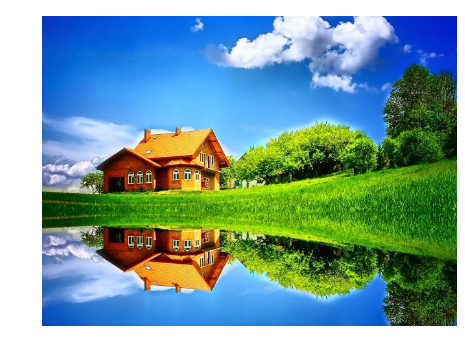

In [9]:
NC = 14
im = cv2.imread('./img.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print im.shape

img = cv2.resize(im, (640, 480))
print img.shape
plt.figure(0)
plt.axis("off")
plt.imshow(img)

plt.show()

In [10]:
image_vector = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
print image_vector.shape

(307200, 3)


In [11]:
km = KMeans(n_clusters=NC)
km.fit(image_vector)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=14, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

(307200,)
[[ 90  58  21]
 [165 100 233]
 [229 141  37]
 [104  49 225]
 [211 156 236]
 [194 108  23]
 [ 22  64 189]
 [240 215 248]
 [147 228 248]
 [ 37  25  11]
 [142 117  91]
 [ 70 165 234]
 [248 186  56]
 [155  73   7]]


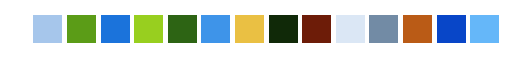

In [23]:
colors = 255 - km.cluster_centers_.astype("uint8")

print km.labels_.shape
print colors
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, NC, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

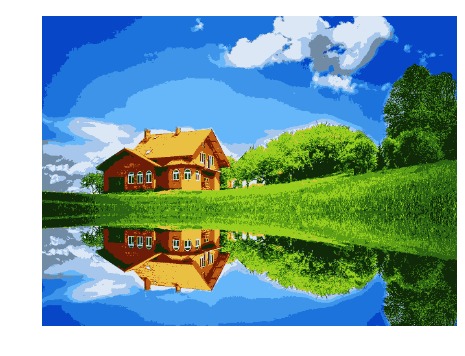

In [16]:
new_im = np.zeros((image_vector.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[km.labels_[ix]]

new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
plt.imshow(new_im)
plt.show()

In [26]:
dom_cols = np.unique(km.labels_, return_counts=True)
lab = dom_cols[0]
print dom_cols
hist = dom_cols[1].astype("float")/dom_cols[1].sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([17502, 29262, 36177, 21081, 31402, 34635, 11100, 34682,  9344,
       17178, 10312,  5349, 21386, 27790]))


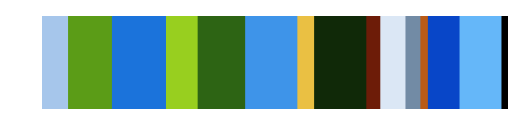

In [33]:
col_sp = np.zeros((100, 500, 3))

start = 0
for (col, percent) in zip(lab, hist):
    # print percent
    end = int(start + percent*col_sp.shape[1])
    # print end
    col_sp[:, start:end, :] = colors[col]
    start = end

plt.figure(0)
plt.axis("off")
plt.imshow(col_sp)

plt.show()